In [1]:
from tbi.segmentation import segmentation
from tbi.label_geometry_measures import label_geometry_measures
from tbi.image_intensity_stat_jac import image_intensity_stat_jac
from tbi.skull_strip import skull_strip

from glob import glob
from nilearn.plotting import plot_img
import nilearn.plotting as plotting
from os.path import join

import os

In [2]:
output = '/data/illustration/out'
mni_file = 'illustration_data/MNI152_T1_1mm_brain.nii'
atlas_file = 'illustration_data/New_atlas_cort_asym_sub.nii.gz'
template_file = 'illustration_data/T_template0.nii.gz'
skull_strip_dir = 'illustration_data/brains'

In [3]:
brains = join(skull_strip_dir, '*.nii.gz')
segmentation_dir = join(output, 'segmentation')
segmentation_args = ['-t', 
                     template_file, 
                     '-a', 
                     atlas_file, 
                     brains, 
                     segmentation_dir
                    ]
segmentation(segmentation_args)

2020-09-10 03:48:49,947 :: tbi.segmentation :: INFO :: Arguments: Namespace(atlas_file='illustration_data/New_atlas_cort_asym_sub.nii.gz', input='illustration_data/brains/*.nii.gz', output='/data/illustration/out/segmentation', template_file='illustration_data/T_template0.nii.gz')
2020-09-10 03:48:50,007 :: tbi.segmentation :: INFO :: Processing illustration_data/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz
2020-09-10 03:48:50,045 :: tbi.segmentation :: INFO :: Registering illustration_data/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz
2020-09-10 03:48:50,047 :: tbi.utils :: INFO :: antsRegistrationSyNQuick.sh -d 3 -n 4 -f illustration_data/T_template0.nii.gz -m illustration_data/brains/ID_0ead008d-ecef2edb6b_brain.nii.gz -o /data/illustration/out/segmentation/REGIS/SyN/ID_0ead008d-ecef2edb6b_preprocessed_SyN
2020-09-10 03:52:32,059 :: tbi.utils :: INFO :: antsRegistrationSyNQuick.sh -d 3 -n 4 -f illustration_data/T_template0.nii.gz -m illustration_data/brains/ID_0ead008d-ecef2edb6b_brain.n

/data/illustration/out/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz


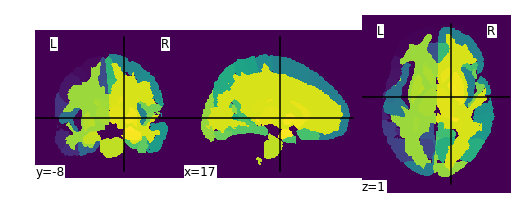

/data/illustration/out/segmentation/SEG/AFFINE/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.nii.gz


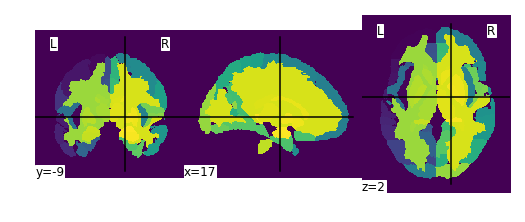

In [4]:
nii_files = glob(join(segmentation_dir, 'SEG/*/*.nii.gz'))
for nii_file in nii_files:
    print(nii_file)
    plot_img(nii_file)
    plotting.show()

In [5]:
label_geometry_measures_dir = join(output, 'label_geometry_measures')
segmentation_dir = join(output, 'segmentation')
label_geometry_measures_args = [join(segmentation_dir, 'SEG/*/*.nii.gz'),
                                label_geometry_measures_dir
                               ]
label_geometry_measures(label_geometry_measures_args)

2020-09-10 03:58:34,770 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/illustration/out/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz
2020-09-10 03:58:34,777 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/illustration/out/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt
2020-09-10 03:58:34,781 :: tbi.utils :: INFO :: LabelGeometryMeasures 3 /data/illustration/out/segmentation/SEG/PHYSCi/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.nii.gz > /data/illustration/out/label_geometry_measures/ID_0ead008d-ecef2edb6b_segmentation_cortical_phy.txt
2020-09-10 03:58:36,680 :: tbi.label_geometry_measures :: INFO :: Processing file name:  /data/illustration/out/segmentation/SEG/AFFINE/ID_0ead008d-ecef2edb6b_segmentation_cortical_affine.nii.gz
2020-09-10 03:58:36,693 :: tbi.label_geometry_measures :: INFO :: Saving to file name: /data/illustration/out/label_geometry_measures/ID_0ead008d-ece

In [6]:
image_intensity_stat_jac_dir = join(output, 'image_intensity_stat_jac')

image_intensity_stat_jac_args = ['-a',
                                 atlas_file,
                                 join(segmentation_dir, 'REGIS/Affine2SyN/*affine2Syn1Warp.nii.gz'), 
                                 image_intensity_stat_jac_dir
                                ]

image_intensity_stat_jac(image_intensity_stat_jac_args)

2020-09-10 03:58:41,829 :: tbi.image_intensity_stat_jac :: INFO :: Processing file name:  /data/illustration/out/segmentation/REGIS/Affine2SyN/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.nii.gz
2020-09-10 03:58:41,832 :: tbi.image_intensity_stat_jac :: INFO :: Saving to file name: /data/illustration/out/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt
2020-09-10 03:58:41,834 :: tbi.utils :: INFO :: ImageIntensityStatistics 3 /data/illustration/out/segmentation/REGIS/Affine2SyN/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.nii.gz illustration_data/New_atlas_cort_asym_sub.nii.gz > /data/illustration/out/image_intensity_stat_jac/ID_0ead008d-ecef2edb6b_preprocessed_affine2Syn1Warp.txt
2020-09-10 03:58:45,302 :: tbi.image_intensity_stat_jac :: INFO :: Done
